(Trial code, officiial implementation is in code 5)
This code auto crops a PNG or JPG image
The first code is for jpg and second for png

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

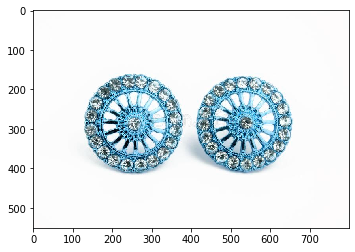

In [3]:
img = cv2.imread("diamond_jpeg_eg.jpg")
plt.imshow(img)

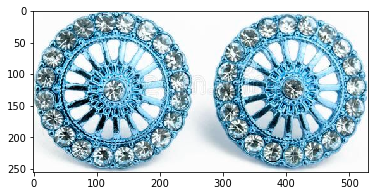

In [4]:
## (1) Convert to gray, and threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshed)
## (2) Morph-op to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)
## (3) Find the max-area contour
cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnt = sorted(cnts, key=cv2.contourArea)[-1]
## (4) Crop and save it
x,y,w,h = cv2.boundingRect(cnt)
dst = img[y:y+h, x:x+w]
plt.imshow(dst)
# cv2.imwrite("updated_diamond.png", dst)

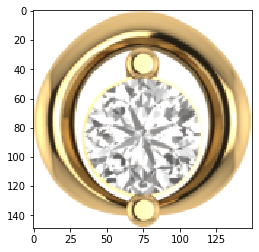

In [6]:
#works only for png cause of axis...
image=Image.open("stone.png")
image.load()

image_data = np.asarray(image)
image_data_bw = image_data.max(axis=2)
non_empty_columns = np.where(image_data_bw.max(axis=0)>0)[0]
non_empty_rows = np.where(image_data_bw.max(axis=1)>0)[0]
cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

image_data_new = image_data[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]

new_image = Image.fromarray(image_data_new)
plt.imshow(new_image)
# new_image.save("cropped_stone.png")

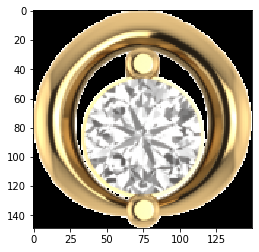

In [7]:
imag = cv2.imread("cropped_stone.png")
rgb = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)